# Preparação

In [1]:
# Instalações:
!pip install yfinance --quiet
!pip install mplfinance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 1.1 MB/s eta 0:00:00


In [2]:
# Bibliotecas:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

# Importação e Preparação dos Dados:

In [3]:
# Importando os dados:
df = yf.download('BTC-USD',start='2020-01-01', end='2020-06-01')
df.drop(['Adj Close','Volume'], axis=1)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...
2020-05-27,8837.380859,9203.320312,8834.157227,9181.017578,9181.017578,32740536902
2020-05-28,9184.945312,9546.319336,9148.457031,9525.750977,9525.750977,34367073114
2020-05-29,9528.355469,9573.666992,9379.338867,9439.124023,9439.124023,32896642044


In [4]:
# Calculo de Retorno:
df['retorno'] = df['Close'].pct_change()

# Média Movel:
df['media_movel'] = df['Close'].rolling(20).mean() # Janela de 20 dias

# Volatilidade:
df['volatilidade']=df['retorno'].rolling(20).std() #  Janela de 20 dias

# Dataframe:
df

,Open,High,Low,Close,Adj Close,Volume,retorno,media_movel,volatilidade
Date,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,NaN,NaN,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,-0.029819,NaN,NaN
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,0.051452,NaN,NaN
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,0.008955,NaN,NaN
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,0.000089,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-27,8837.380859,9203.320312,8834.157227,9181.017578,9181.017578,32740536902,0.039158,9257.225977,0.035286
2020-05-28,9184.945312,9546.319336,9148.457031,9525.750977,9525.750977,34367073114,0.037548,9241.380225,0.036391
2020-05-29,9528.355469,9573.666992,9379.338867,9439.124023,9439.124023,32896642044,-0.009094,9233.641602,0.036001


# Visualizações:


<Axes: xlabel='Date'>

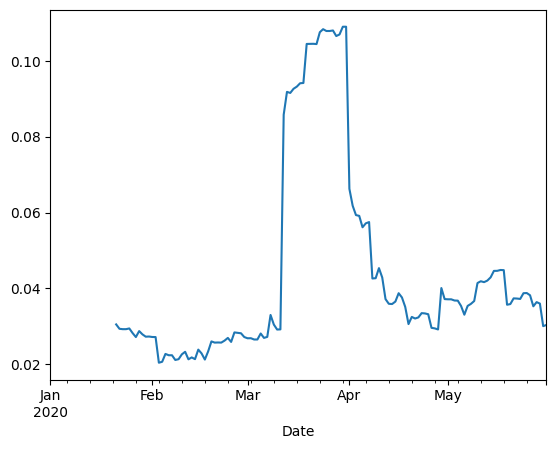

In [5]:
df['volatilidade'].plot()

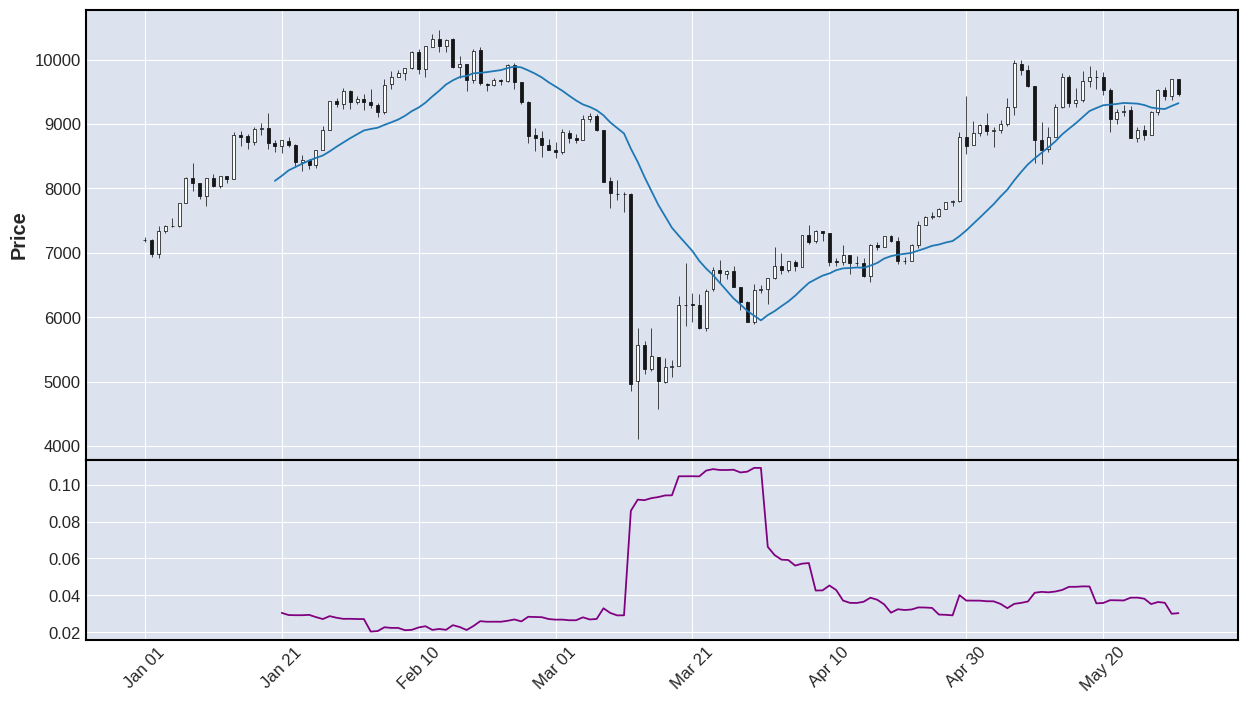

In [6]:
df_plot = df.copy()

# indicadores:
plot_mean = mpf.make_addplot(df_plot['media_movel'])
plot_vol = mpf.make_addplot(df_plot['volatilidade'],panel=1,color='purple')

# plot
mpf.plot(df_plot,type='candle',addplot=[plot_mean,plot_vol], figsize=(16,9))